**OBJECTIVES:**
 Improve rescue and evacuation strategies by predicting which kinds of passengers are more likely to survive in disasters like Titanic. This can guide decision-makers in planning lifeboats, crew training, and resource allocation.

**OUTCOME:**
 Predict whether a passenger survives (binary: 0 = did not survive, 1 = survived).

**METRICS:**
 Recall, because missing a potential survivor could mean failing to save a life, which is more costly than mistakenly predicting someone survived.

In [1]:
# Loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")

Saving train.csv to train (1).csv


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Summary Statics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Checking missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


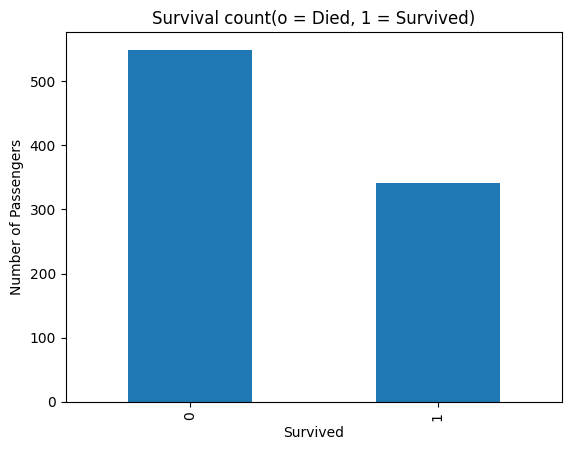

In [9]:
# Bar plot of survival
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival count(o = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

# OBSERVATIONS

1. The dataset contains 891 rows and 12 columns

2. The Survived columns shows that more passengers did not survive than those who survived.

3. The Age column has missing values (177 missing entries)

4. The cabin columns has many missing values (almost most of them).

5. The embarked column has a few missing values

---



**HANDLING MISSING VALUES**

In [12]:
# Filling the missing Age values with the median: This is because data has some outlier
# and moreover it is not symmetry.

## a. Age

df['Age'].fillna(df['Age'].median(), inplace = True)

/tmp/ipython-input-3309223504.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [13]:
## b. Embarked
# Only two row were missing so it is safe to drop them.

df.dropna(subset=['Embarked'], inplace=True)

In [14]:
## c. Cabin
# I will drop Cabin column because it has too many missing values (687 of them)

df.drop(columns=['Cabin'], inplace = True)

**CHECKING FOR DUPLICATES**

In [17]:
print("Number of duplicate rows: ")
df[df.duplicated()].sum()

Number of duplicate rows: 


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0.0
SibSp,0
Parch,0
Ticket,0
Fare,0.0


**HANDLING OUTLIERS IN FARE**

In [19]:

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

# Capping the fare values at the bounds
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound,
                     np.where(df['Fare'] < lower_bound, lower_bound, df['Fare']))

**VERIFY CLEANING**

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# FINDINGS
In this assignment, I formulated the problem of predicting passenger survival on the Titanic as a binary classification task. The business objective is to help improve future rescue and evacuation strategies by identifying which passengers are more likely to survive. The outcome is predicting whether a passenger survived (1) or not (0). I chose recall as the success metric because, in such life-or-death situations, it is more important to correctly identify as many survivors as possible, even if some false positives occur.

During data exploration, I found that the dataset contains 891 rows and 12 columns. Some columns, such as Age, Cabin, and Embarked, had missing values. I cleaned the dataset by filling missing ages with the median, dropping rows with missing embarked values, and removing the Cabin column since it had too many missing entries. I also checked for duplicates and handled outliers in the Fare column using the IQR method. After cleaning, the dataset had no missing values and was ready for further analysis. This process showed me how important it is to carefully prepare and understand data before building any machine learning models.